In [1]:
%matplotlib inline
import sys
sys.path.insert(0,'..')
from IPython.display import HTML,Image,SVG,YouTubeVideo



# The watershed transform
## Principes


The idea behind the watershed transform is to isolate regions of the image similarily to hydrographic region in geography. An image can indeed be seen as a 2D and a half data, i.e. with the gray level considered as the altitude. 

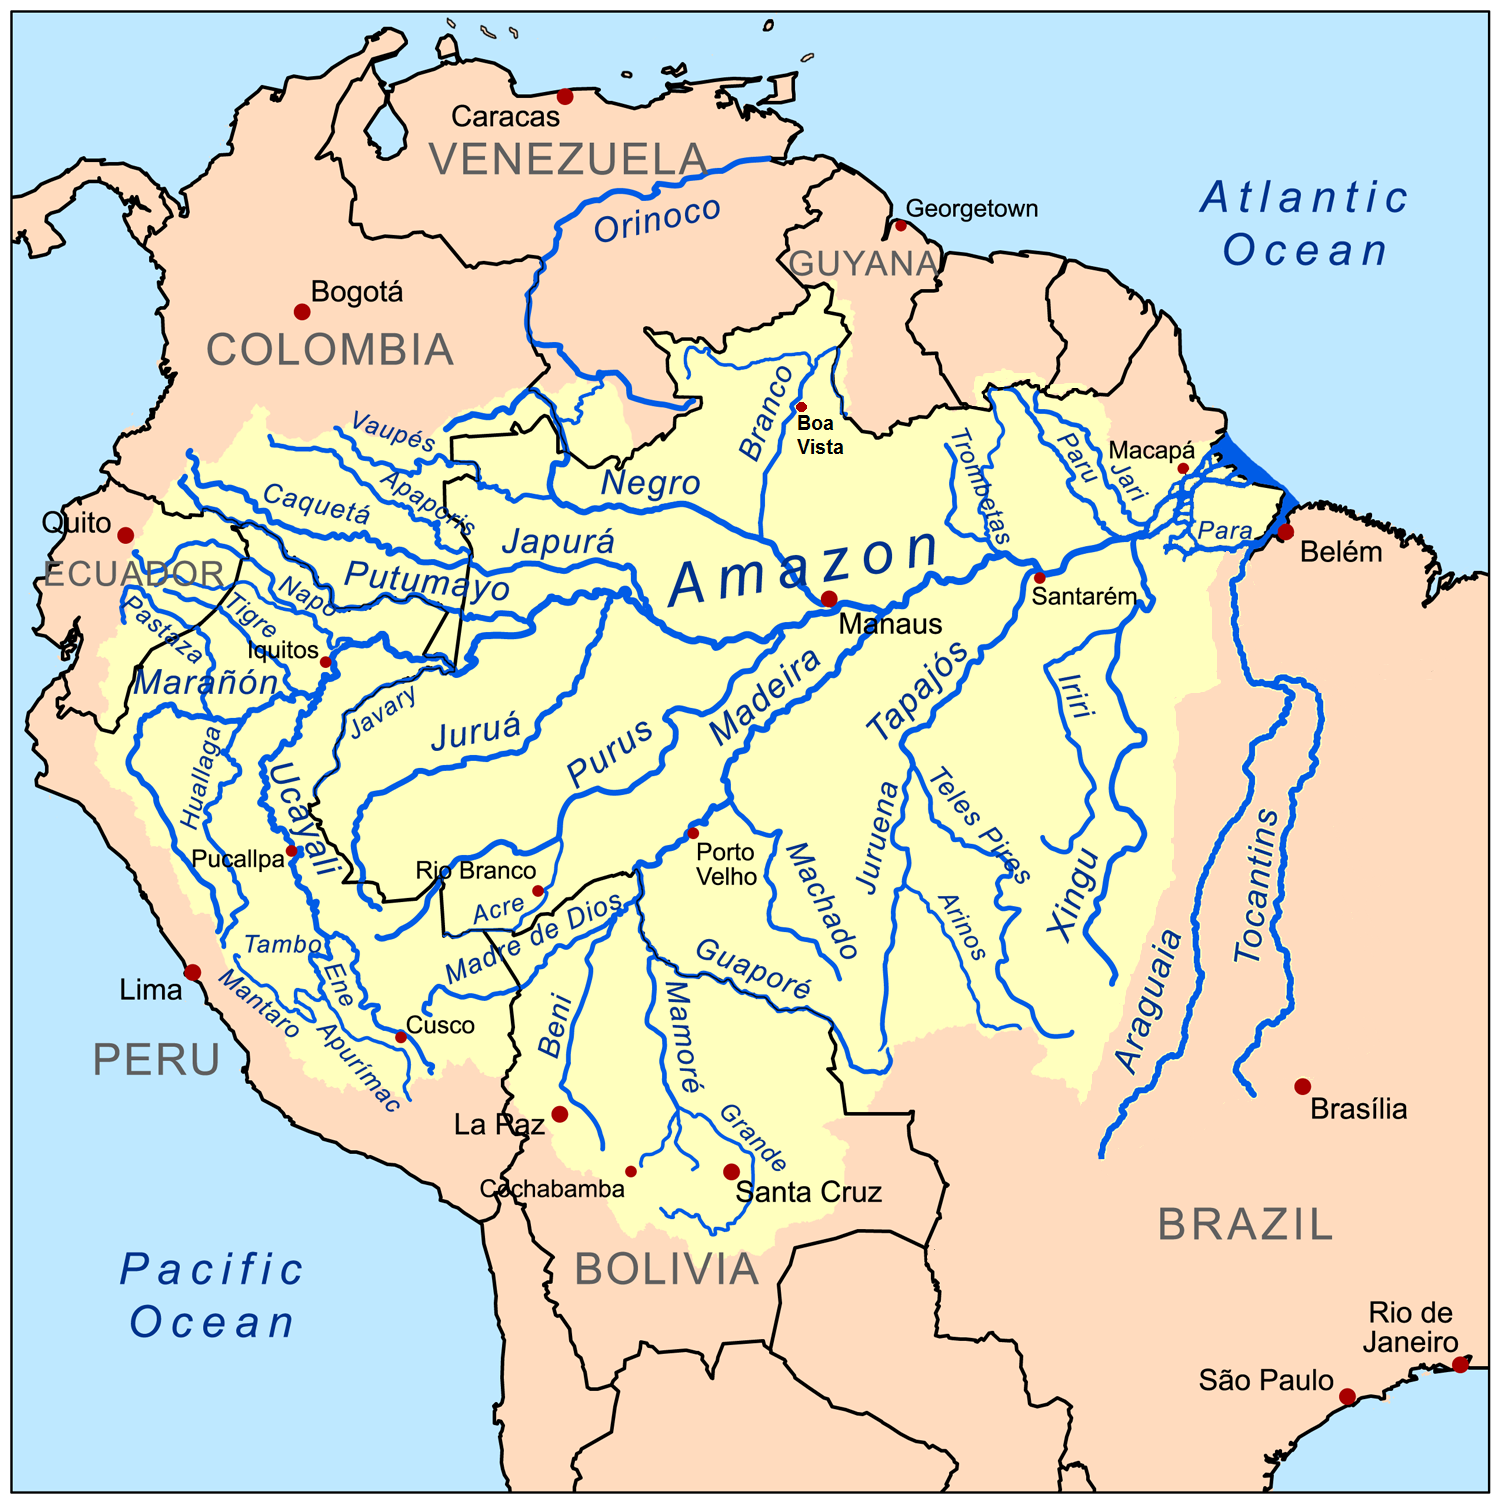

In [2]:
Image('https://upload.wikimedia.org/wikipedia/commons/0/02/Amazonriverbasin_basemap.png')

If one look at the gradient of an image, the borders of the objects correspond to the crests of the gradient surface.
## Gradient crests

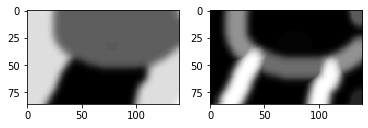

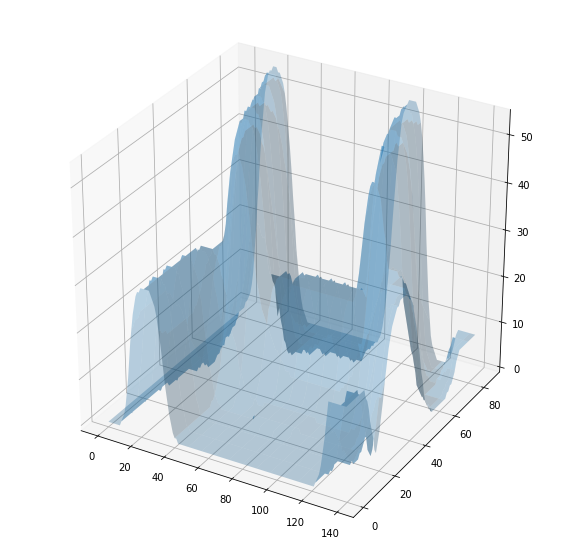

In [3]:
from skimage.data import imread
import numpy as np
from skimage.morphology import disk
import skimage.filters.rank as skr
from skimage.measure import label
from skimage.morphology import watershed,disk
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
from mpl_toolkits.mplot3d import axes3d, Axes3D

ima = imread('http://homepages.ulb.ac.be/~odebeir/data/ws2.png')[:,:,0]
gradient = skr.gradient(ima,disk(10))

plt.subplot(1,2,1)
plt.imshow(ima,cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(gradient,cmap=plt.cm.gray)

m,n = gradient.shape


fig = plt.figure(figsize=[10,10])
ax = fig.gca(projection='3d')
X,Y = np.meshgrid(range(n),range(m))
Z = gradient



ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3);




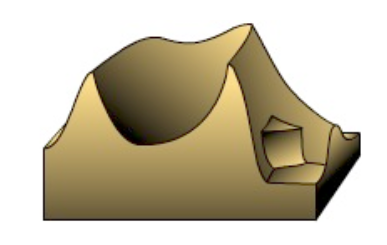

In [4]:
Image('http://homepages.ulb.ac.be/~odebeir/data/watershed2.png')

## local gradient
local minima are extracted from the gradient image

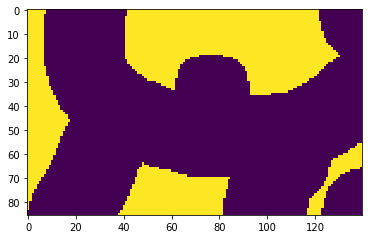

In [5]:
local_min = gradient <= skr.minimum(gradient,disk(20))
marks = label(local_min,background=0)

plt.figure()
plt.imshow(local_min);

## watershed basins 
one watershed basin for each minimum

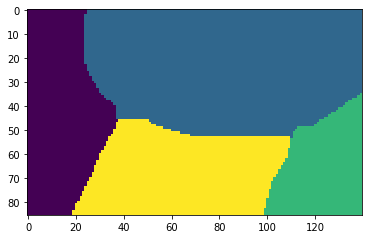

In [6]:
ws = watershed(gradient,marks)
plt.figure()
plt.imshow(ws);

## basins border overlay 
the borders are align with the objects borders

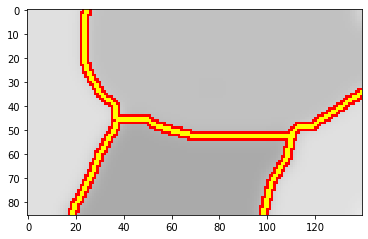

In [7]:
result = mark_boundaries(ima,ws,outline_color=[1,0,0])

plt.figure()
plt.imshow(result);

## Watershed pros and cons
The watershed algorithm identifies each local basin starting from each local minimum of the image, each time two adjacent basins are merging, one add a virtual dam between the two basins in order to keep them separated, when the image is completely flooded, the top of the dams is the result of the watershed transform, in other words, the watershed segmentation is the split of the image into its basins.

advantages of the watershed method

* extremely sensitive to borders
* produces closed borders (in fact it produces regions!)

limitations of the method

* produces a lot of regions (each local minimum !)
* prone to over-segmentation


solutions to limit over-segmentation

* pre-filtering
* using marked watershed (see example below)
* merging adjacent basins having similar gray level, etc

question:
* how to build a good markers image ?

## Touching objects separation
classical problem of spliting touching objects

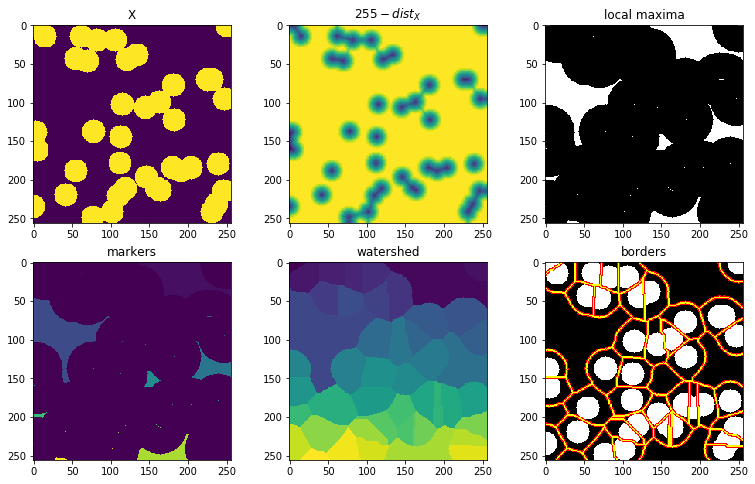

In [8]:
import numpy as np
from skimage.morphology import disk
import skimage.filters.rank as skr
from skimage.measure import label
from skimage.morphology import watershed
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries

np.random.seed(1)
n = np.random.random((256,256))<.0005
d = skr.maximum(n,disk(15))

distance = ndi.distance_transform_edt(d).astype(np.uint8)
local_max = distance == skr.maximum(distance,disk(20))
marks = label(local_max,background=0)

ws = watershed(255-distance,marks)

result = mark_boundaries(d,ws,outline_color=[1,0,0])

plt.figure(figsize=[13,8])
plt.subplot(2,3,1)
plt.imshow(d)
plt.title('X')
plt.subplot(2,3,2)
plt.imshow(255-distance)
plt.title('$255-dist_X$')
plt.subplot(2,3,3)
plt.imshow(local_max,cmap=plt.cm.gray)
plt.title('local maxima')
plt.subplot(2,3,4)
plt.imshow(marks)
plt.title('markers')
plt.subplot(2,3,5)
plt.imshow(ws)
plt.title('watershed')
plt.subplot(2,3,6)
plt.imshow(result)
plt.title('borders');


## Cell segmentation example
example of a segmentation for low contrast objects

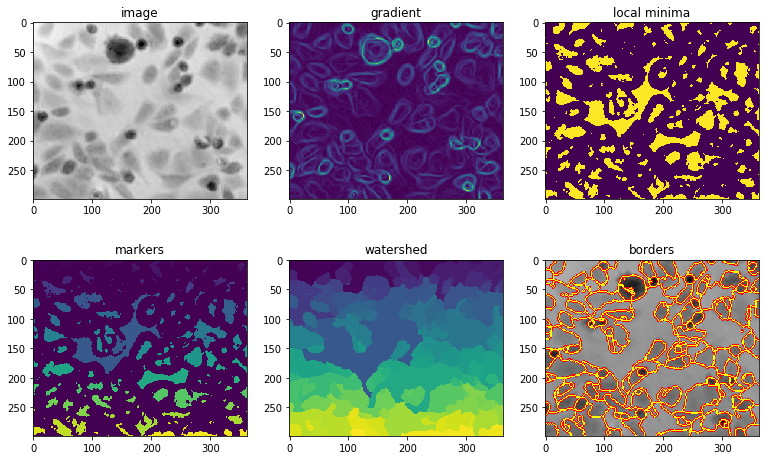

In [9]:
import numpy as np
from scipy import ndimage

ima = imread('http://homepages.ulb.ac.be/~odebeir/data/cells.tif')

#filtered version
lp = skr.median(ima,disk(5))
grad = skr.gradient(lp,disk(1))
mark = skr.minimum(ima,disk(10))+10 >= ima

lab = label(mark,background=0)
ws = watershed(grad,lab)

result = mark_boundaries(ima,ws,outline_color=[1,0,0])

plt.figure(figsize=[13,8])
plt.subplot(2,3,1)
plt.imshow(ima,cmap=plt.cm.gray)
plt.title('image')
plt.subplot(2,3,2)
plt.imshow(grad)
plt.title('gradient')
plt.subplot(2,3,3)
plt.imshow(mark)
plt.title('local minima')
plt.subplot(2,3,4)
plt.imshow(lab)
plt.title('markers')
plt.subplot(2,3,5)
plt.imshow(ws)
plt.title('watershed')
plt.subplot(2,3,6)
plt.imshow(result)
plt.title('borders');


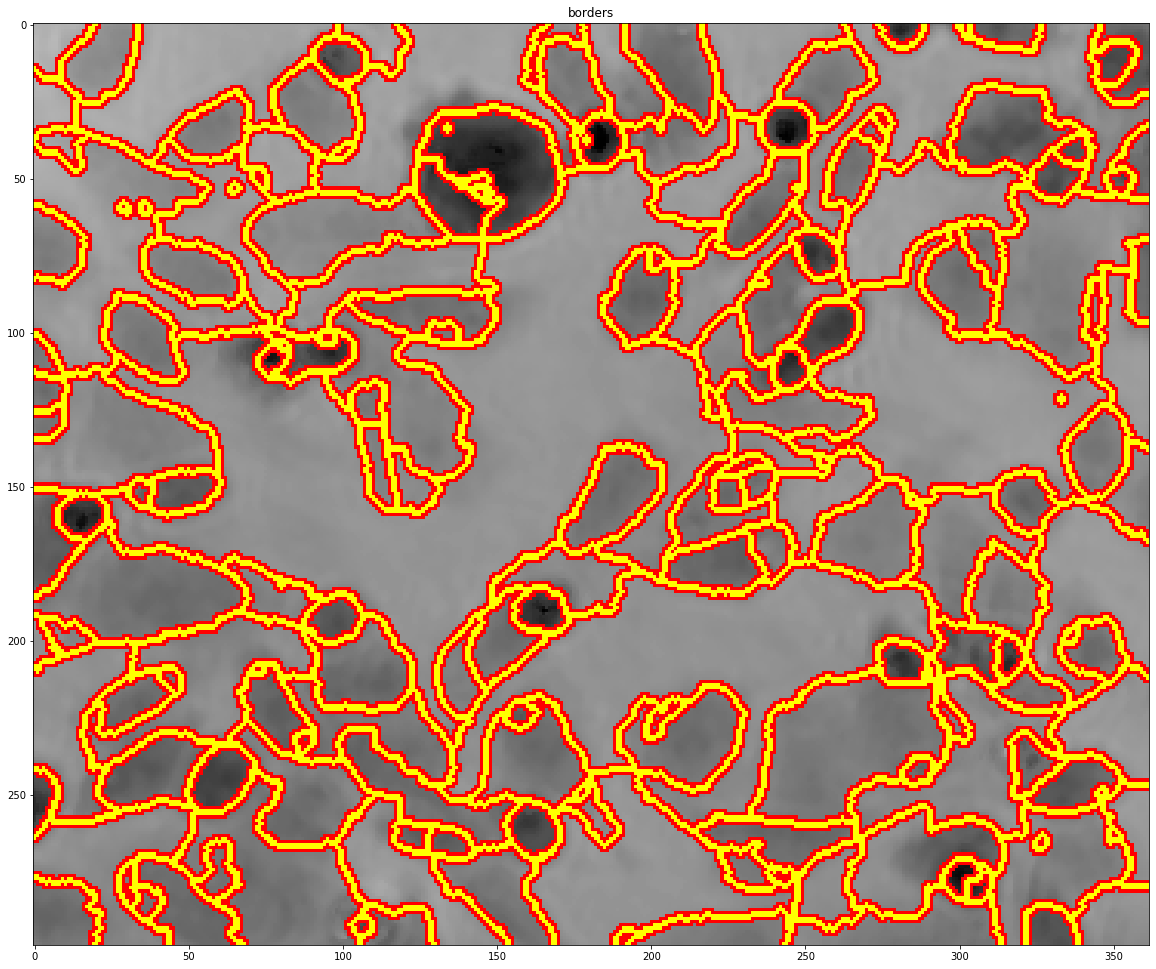

In [10]:
plt.figure(figsize=[20,20])
plt.imshow(result)
plt.title('borders');

question:
* how to group adjacent regions that share a similar gray level ?

>see also:
* The watershed transform {% cite dougherty2018mathematical %} pp443-481


### References 
{% bibliography --cited %}